In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotly.graph_objects as go

In [3]:
import glob 

In [4]:
glob.glob(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\S&P_resources\individual_stocks_5yr\*csv')

['C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects

In [5]:
len(glob.glob(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\S&P_resources\individual_stocks_5yr\*csv'))

505

In [6]:
company_list = [
     r'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
     r'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
     r'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
     r'C:\\Users\\User\\Documents\\GitHub\\Data_Analytics_Projects-\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
]

In [8]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index = True)

In [9]:
all_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [10]:
tech_list = all_data['Name'].unique()

In [11]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [12]:
all_data.duplicated().sum()

np.int64(0)

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [15]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

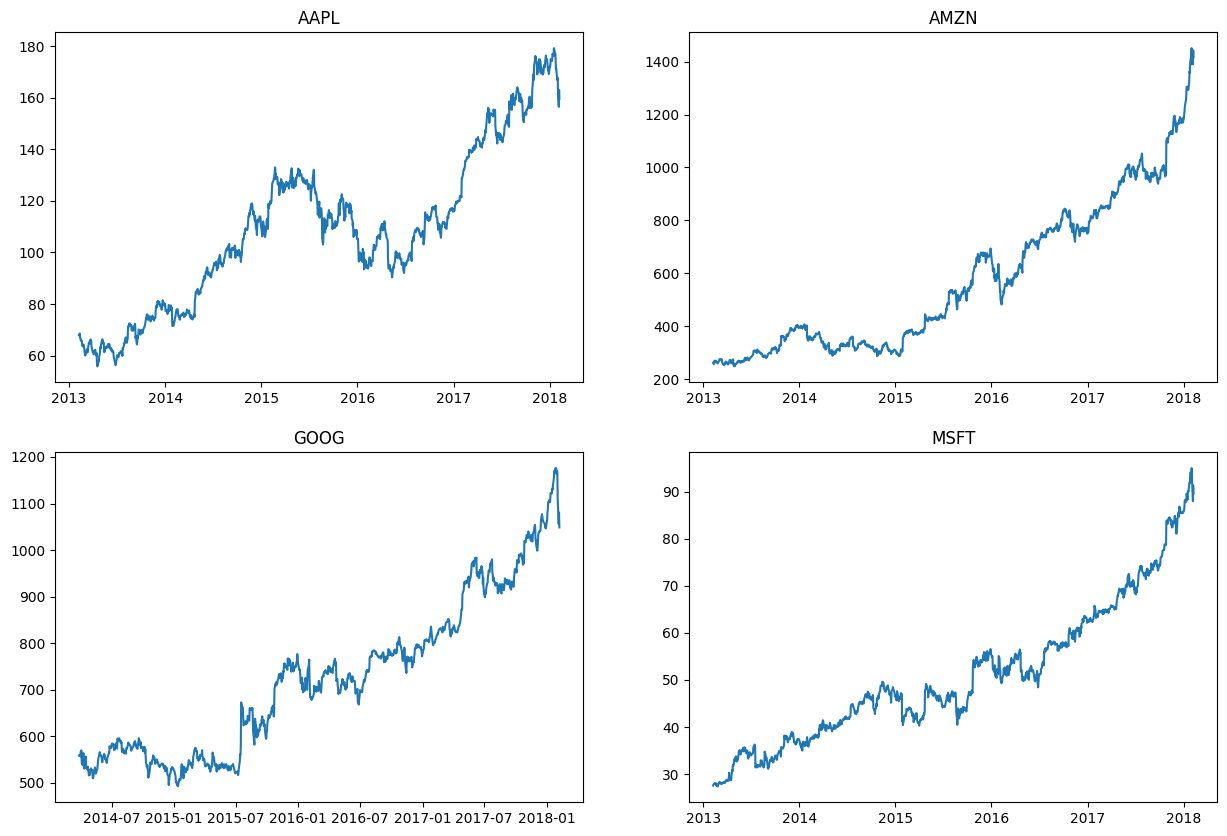

In [16]:
plt.figure(figsize=(15,10))
for index, company in enumerate(tech_list,1):
    plt.subplot(2, 2, index)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

plt.show()

In [17]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [18]:
all_data['close'].rolling(window = 10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4747    92.765
4748    92.943
4749    92.582
4750    92.525
4751    92.304
Name: close, Length: 4752, dtype: float64

In [19]:
new_data = all_data.copy()

In [20]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close'+str(ma)] = new_data['close'].rolling(window = ma).mean()
    


In [21]:
new_data.tail()

,date,open,high,low,close,volume,Name,close10,close20,close50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [22]:
new_data.set_index('date', inplace = True)

In [23]:
new_data.head(5)

,open,high,low,close,volume,Name,close10,close20,close50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN


In [24]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close50'],
      dtype='object')

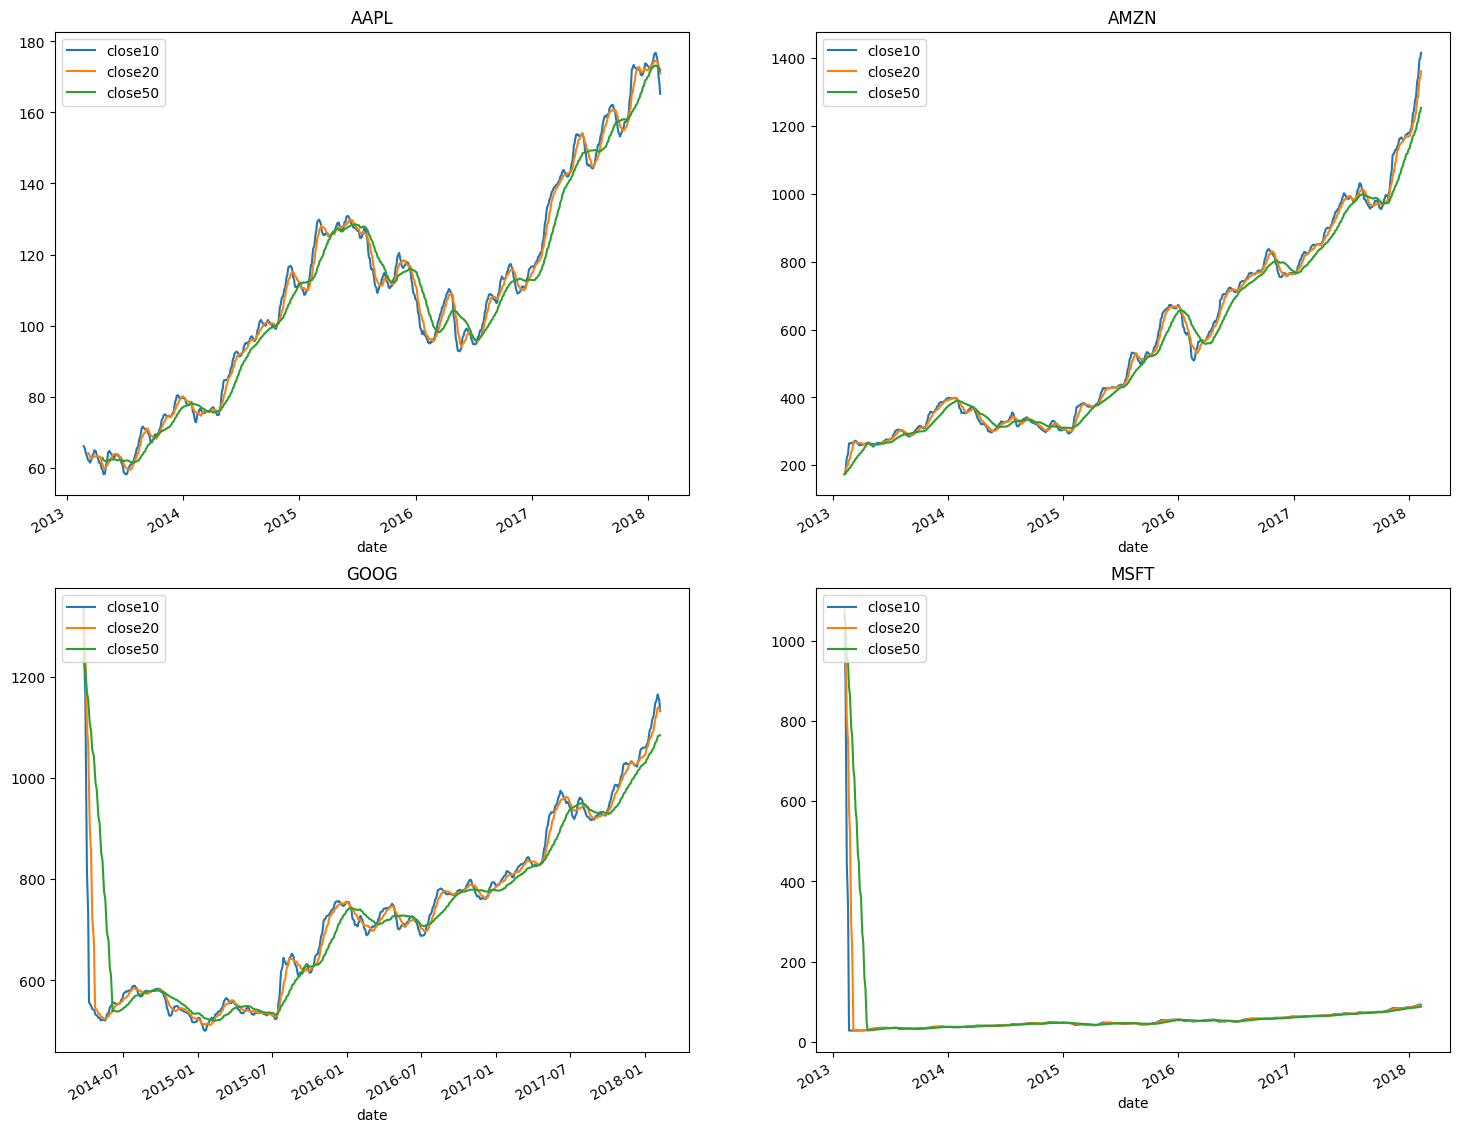

In [25]:
plt.figure(figsize=(18,15))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    df = new_data[new_data['Name'] == company]
    df[['close10', 'close20', 'close50']].plot(ax = plt.gca())
    plt.title(company)
    plt.legend(loc='upper left')


In [26]:
company_list

['C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [27]:
apple = pd.read_csv(company_list[0])

In [28]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [29]:
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [30]:
apple['Daily_return (in %)'] = apple['close'].pct_change()*100

In [31]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily_return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [32]:
import plotly.express as px 

In [33]:
px.line(apple, x = 'date', y = 'Daily_return (in %)')

In [34]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily_return (in %)    float64
dtype: object

In [35]:
apple['date'] = pd.to_datetime(apple['date'])

In [36]:
apple.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Daily_return (in %)           float64
dtype: object

In [37]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily_return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [38]:
apple.set_index('date', inplace = True)

In [39]:
apple.head()

,open,high,low,close,volume,Name,Daily_return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


<Axes: xlabel='date'>

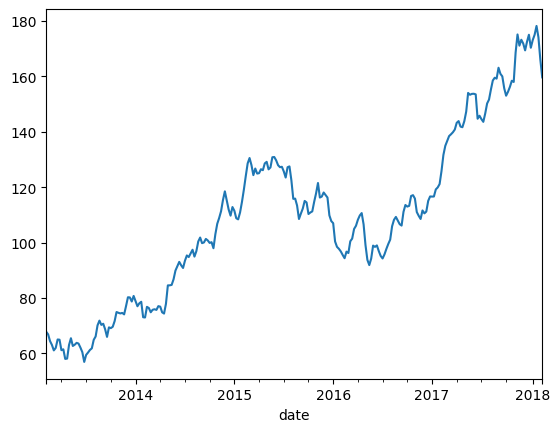

In [40]:
apple['close'].resample('W').mean().plot()

<Axes: xlabel='date'>

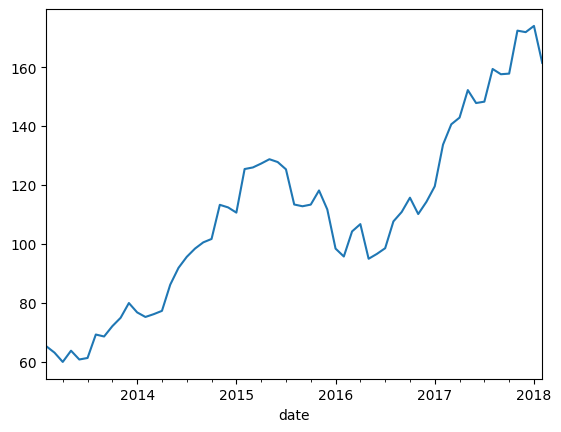

In [41]:
apple['close'].resample('ME').mean().plot()

<Axes: xlabel='date'>

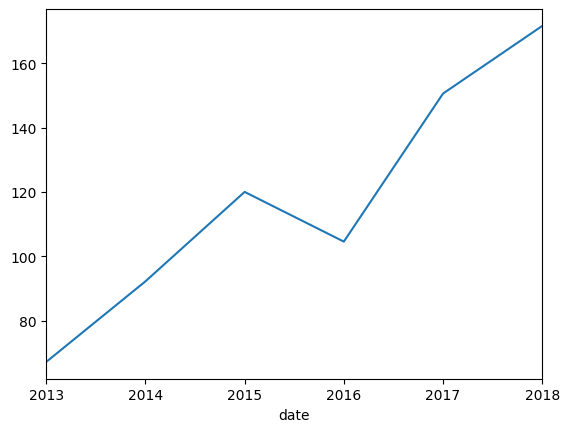

In [42]:
apple['close'].resample('YE').mean().plot()

In [43]:
company_list

['C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

<Axes: xlabel='date'>

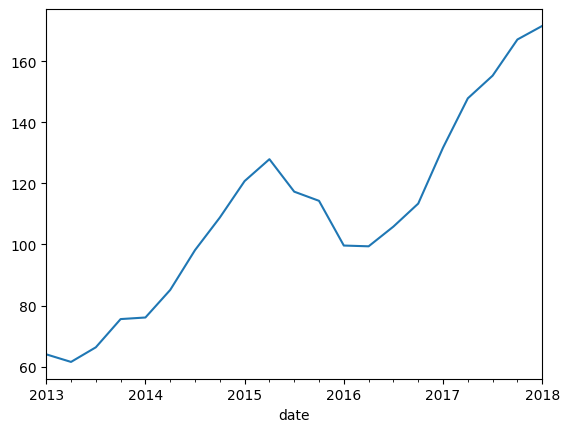

In [44]:
apple['close'].resample('QE').mean().plot()

In [45]:
company_list

['C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\User\\\\Documents\\\\GitHub\\\\Data_Analytics_Projects-\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [46]:
test = []
names = ['AAPL', 'AMZN', 'GOOGLE', 'MSFT']
for file in company_list:
    current_df = pd.read_csv(file)
    test.append(current_df)

closing_price = pd.DataFrame()
for i in range(len(test)):
    closing_price['close_'+names[i]] = test[i]['close']

closing_price

,close_AAPL,close_AMZN,close_GOOGLE,close_MSFT
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


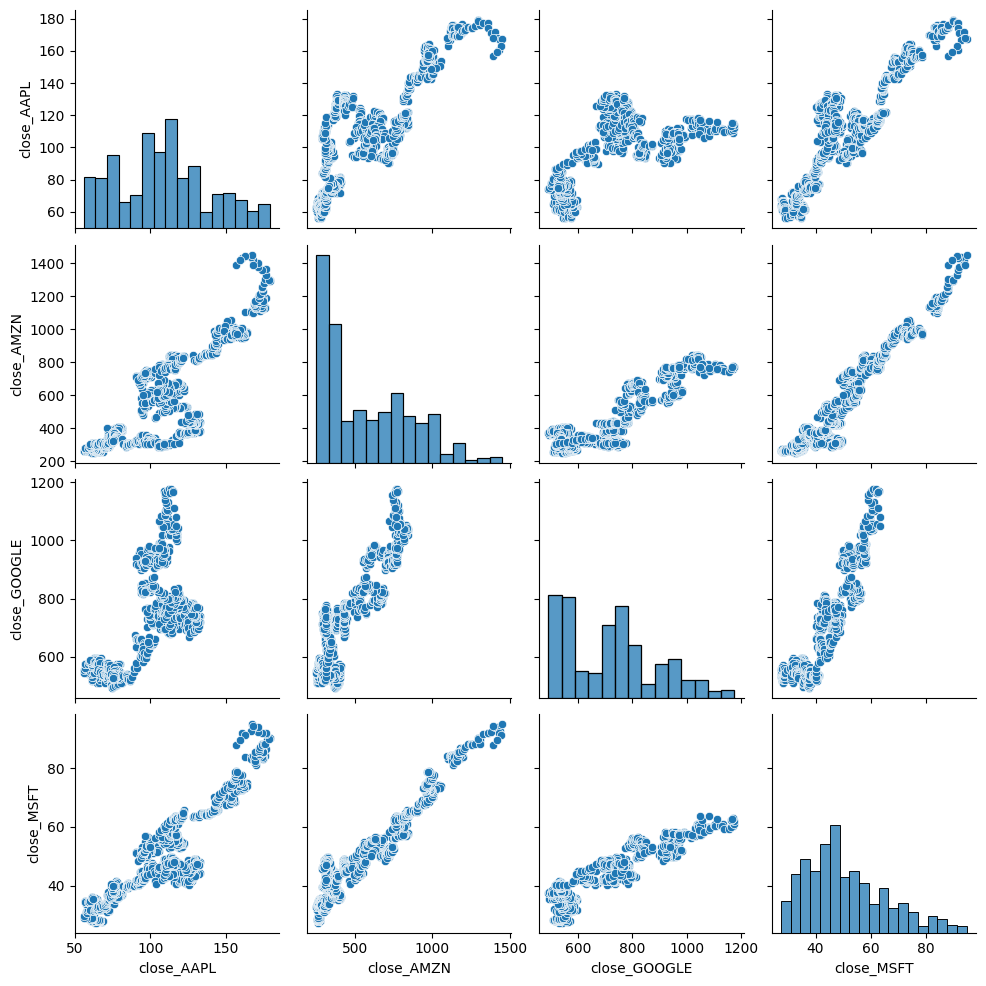

In [47]:
sns.pairplot(closing_price)
plt.show()

In [48]:
closing_price.corr()

,close_AAPL,close_AMZN,close_GOOGLE,close_MSFT
close_AAPL,1.000000,0.819078,0.640522,0.899689
close_AMZN,0.819078,1.000000,0.888456,0.955977
close_GOOGLE,0.640522,0.888456,1.000000,0.907011
close_MSFT,0.899689,0.955977,0.907011,1.000000


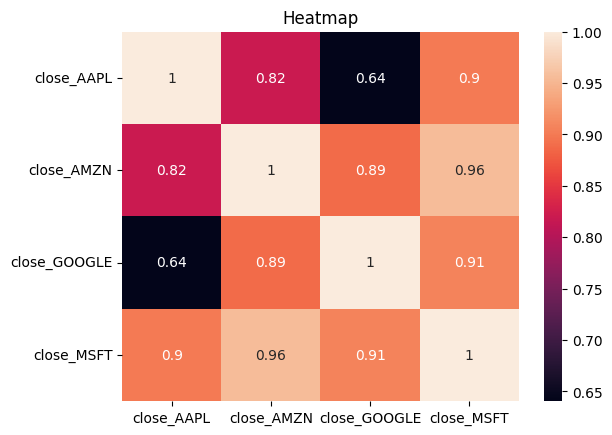

In [49]:
sns.heatmap(closing_price.corr(), annot = True)
plt.title('Heatmap')
plt.show()

In [50]:
# apple['Daily_return (in %)'] = apple['close'].pct_change()*100


pct_temp = []
names = ['AAPL', 'AMZN', 'GOOGLE', 'MSFT']
for file in company_list:
    current_df = pd.read_csv(file)
    pct_temp.append(current_df)

pct_change = pd.DataFrame()
for i in range(len(pct_temp)):
    pct_change[names[i]+'_pct_change'] = pct_temp[i]['close'].pct_change()*100

pct_change




,AAPL_pct_change,AMZN_pct_change,GOOGLE_pct_change,MSFT_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


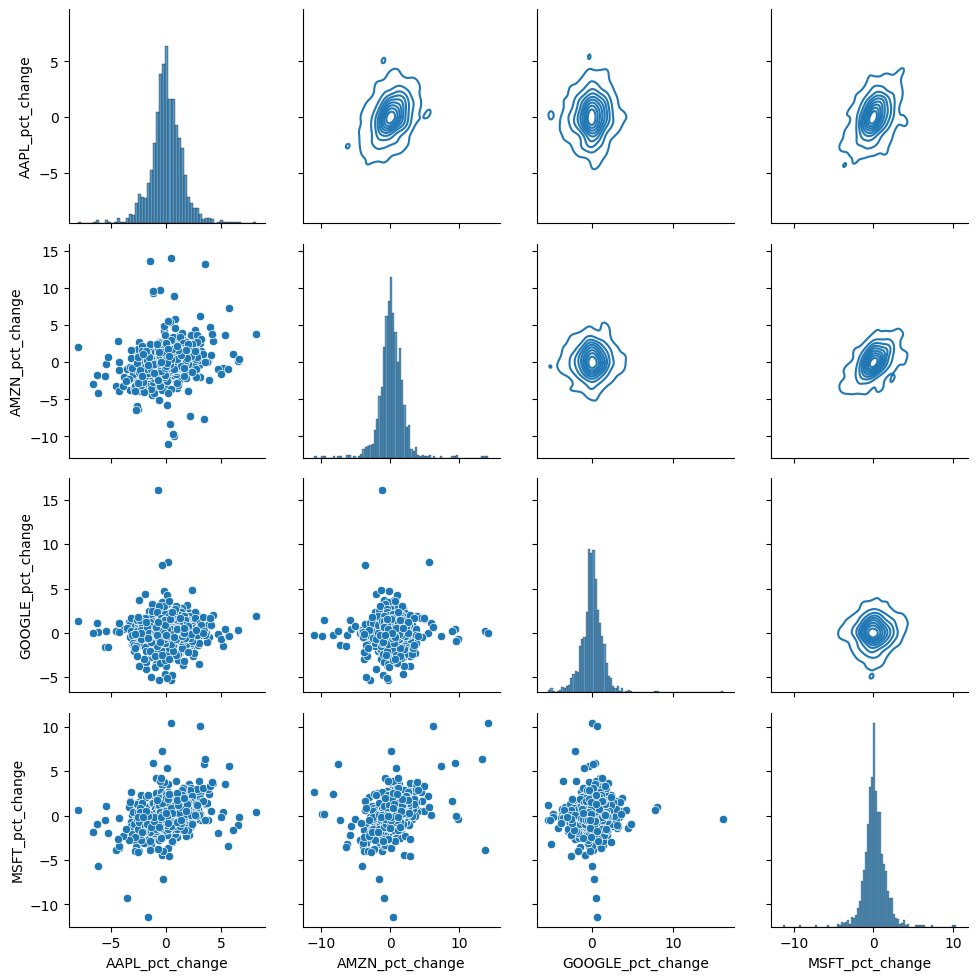

In [51]:
g = sns.PairGrid(data = pct_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
plt.show()

In [52]:
pct_change.corr()

,AAPL_pct_change,AMZN_pct_change,GOOGLE_pct_change,MSFT_pct_change
AAPL_pct_change,1.000000,0.287659,0.036202,0.366598
AMZN_pct_change,0.287659,1.000000,0.027698,0.402678
GOOGLE_pct_change,0.036202,0.027698,1.000000,0.038939
MSFT_pct_change,0.366598,0.402678,0.038939,1.000000


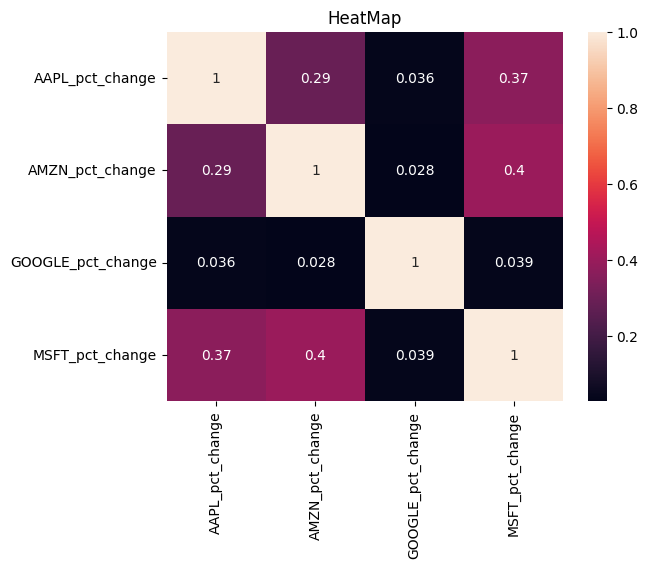

In [53]:
sns.heatmap(pct_change.corr(), annot = True)
plt.title('HeatMap')
plt.show()